In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
from datetime import date, timedelta
import seaborn as sns
import time
import random
import itertools

from fund_tools import *
from AIP import *

![jupyter](./framework.png)

In [2]:
# Set date variable

today = date.today()
first_day_of_the_week = today - timedelta(days=today.weekday())
# end = start + timedelta(days=6)
print("Today: " + str(today))
print("Start: " + str(first_day_of_the_week))
# print("End: " + str(end))

Today: 2022-01-21
Start: 2022-01-17


In [3]:
stock_zh_index_spot_df = ak.stock_zh_index_spot()[['代码','名称']]
stock_zh_index_spot_df

100%|██████████| 8/8 [00:02<00:00,  3.19it/s]


,代码,名称
0,sh000001,上证指数
1,sh000002,Ａ股指数
2,sh000003,Ｂ股指数
3,sh000004,工业指数
4,sh000005,商业指数
...,...,...
583,sz988006,
584,sz988007,
585,sz988106,
586,sz988107,


- 中欧量化驱动基准指数：$创业板指数收益率 \times 95\% + 中债综合指数收益率 \times 5\%$

In [13]:
stock_zh_index_spot_df[(stock_zh_index_spot_df['名称'] == '沪深300')|(stock_zh_index_spot_df['名称'] == '创业板指')]

,代码,名称
144,sh000300,沪深300
237,sz399006,创业板指
299,sz399300,沪深300


In [111]:
stock_zh_index_spot_df[stock_zh_index_spot_df['代码'] == 'sh000300']['名称'].values[0]

'沪深300'

In [27]:
start_date = pd.to_datetime('2018-05-16')
end_date = pd.to_datetime(date.today())

HS300_index = ak.stock_zh_index_daily(symbol="sh000300")[['date', 'close']]
CY_index = ak.stock_zh_index_daily(symbol="sz399006")[['date', 'close']]

fund_value = get_fund_net_worth('001980', start_date=start_date, end_date=end_date, fund_category='open')


In [65]:
fund_value = fund_value.set_index('净值日期')

In [67]:
fund_value.join(df)

,单位净值,日增长率,close,net worth
净值日期,,,,
2018-05-16,1.0000,0.00,NaN,NaN
2018-05-18,1.0002,0.00,1836.754,1.003031
2018-05-25,1.0003,0.00,1804.549,0.985444
2018-06-01,0.9999,0.00,1709.548,0.933565
2018-06-08,1.0008,0.00,1711.522,0.934643
...,...,...,...,...
2022-01-17,1.8288,1.50,3170.408,1.731324
2022-01-18,1.8300,0.07,3144.333,1.717085
2022-01-19,1.8140,-0.87,3075.977,1.679757


In [66]:
df = df.set_index('date')

In [42]:
df = CY_index.loc[mask]

df['net worth'] = df['close'].values[0]

df['net worth'] = df['close']/df['net worth']


In [125]:
# make a plot with fund net worth and base

def fund_vs_benchmark(fund, benchmark_list, start_date, end_date, PLOT=True):

    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    stock_zh_index_spot_df = ak.stock_zh_index_spot()[['代码','名称']]


    fund_value = get_fund_net_worth(fund, start_date=start_date, end_date=end_date, fund_category='open').set_index('净值日期')
    benchmark_df = pd.DataFrame()
    index_list = []
    for benchmark in benchmark_list:

        benchmark_index = ak.stock_zh_index_daily(symbol=benchmark)[['date', 'close']]
        benchmark_index = benchmark_index.loc[(benchmark_index['date'] >= start_date) & (benchmark_index['date'] <= end_date)]
        benchmark_index[benchmark] = benchmark_index['close'].values[0]
        benchmark_index[benchmark] = benchmark_index['close']/benchmark_index[benchmark]
        benchmark_index = benchmark_index.set_index('date')
        benchmark_df = pd.concat([benchmark_df, benchmark_index], axis=1)

        index_list.append(stock_zh_index_spot_df[stock_zh_index_spot_df['代码'] == benchmark]['名称'].values[0])
    fund_value = fund_value.join(benchmark_df[benchmark_list])
    
    if PLOT:
        fig = plt.figure(figsize=(12,8))

        for i in range(len(index_list)):
            plt.plot(fund_value[benchmark_list[i]], label=index_list[i])
        plt.plot(fund_value['单位净值'], label='基金净值')
        plt.legend()
        plt.title('基金累计收益率与基准指数收益对比')

    return fund_value


100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


,单位净值,日增长率,sh000300,sz399006
净值日期,,,,
2018-05-16,1.0000,0.00,1.000000,1.000000
2018-05-18,1.0002,0.00,1.002625,0.994628
2018-05-25,1.0003,0.00,0.980388,0.977188
2018-06-01,0.9999,0.00,0.968595,0.925744
2018-06-08,1.0008,0.00,0.970914,0.926813
...,...,...,...,...
2022-01-17,1.8288,1.50,1.224625,1.716820
2022-01-18,1.8300,0.07,1.236460,1.702700
2022-01-19,1.8140,-0.87,1.227991,1.665684


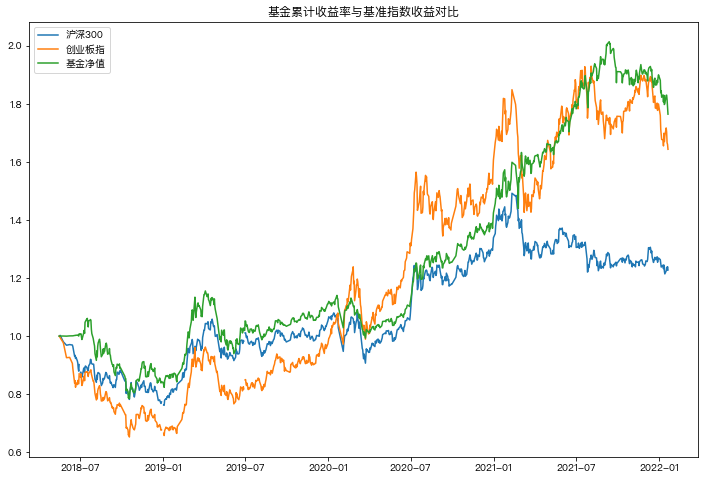

In [126]:
fund_vs_benchmark('001980', ['sh000300', 'sz399006'], '2018-05-16', end_date)

In [117]:
l = ['1','2']
l.append('3')

In [118]:
l

['1', '2', '3']